In [1]:
import pandas as pd # to create data frame and preprocess data 

import numpy as np  ##  used for mathematical computation

import matplotlib.pyplot as plt  ## used for plotting data in python

import seaborn as sns ## used for plotting data in python

sns.set(style = 'darkgrid') ## setting the dtyle to darkgride 

## pca is used to Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a 
## lower dimensional space.
from sklearn.decomposition import PCA 

## importing agglomerative clustering library
from sklearn.cluster import AgglomerativeClustering

## importing standardScalar and Normalize
## it is used to Standardize features by removing the mean and scaling to unit variance
## Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the 
## individual features do not more or less look like standard normally distributed data
## Normalize: normalization aims to remove data redundancy
from sklearn.preprocessing import StandardScaler, normalize

## clusters the data like binary tree
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv("features_flight_heli.csv")
data.head()

,fname,alt_max,vert_acc,horiz_speed,dist,is_maneuver
0,./Flight_Heli_data\24910003_dali_airport_to_gu...,9479.0,-0.143793,241.277903,12.318341,0
1,./Flight_Heli_data\24910005_sanya_phoenix_inte...,10104.0,0.537735,171.344710,17.558203,1
2,./Flight_Heli_data\2491000a_shenyang_taoxian_i...,3650.0,-1.418815,123.471539,0.605749,1
3,./Flight_Heli_data\2491000b_xi'an_xianyang_int...,9479.0,-0.000318,235.397455,13.761831,1
4,./Flight_Heli_data\2491000c_millington_regiona...,10066.0,-0.208709,135.173804,13.815511,1


In [3]:
## initilizing scalar 
scaler = StandardScaler()
## fitting the scalar and transforming data after dropping the 1st column i.e. fname
X = scaler.fit_transform(data.drop(['fname'], axis = 1).values)
## normalizing the X data
X_normalized = normalize(X)
##  creating dataframe of normalized data
X_normalized = pd.DataFrame(X_normalized)

In [4]:
## pca: process of computing the principal components and using them to perform a change of 
## basis on the data, sometimes using only the first few principal components and ignoring the rest.
## setting the n values to 2
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

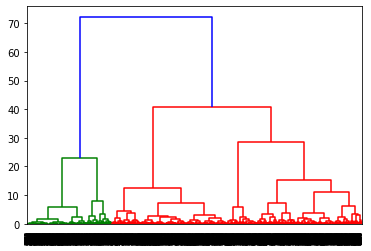

In [5]:
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))

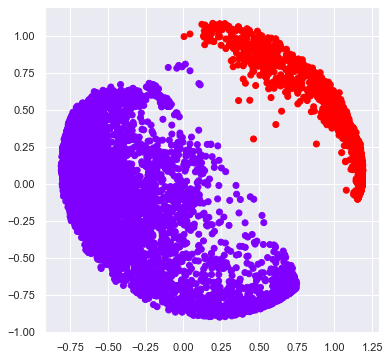

In [5]:
## fitting agglomerative algo on data for no. of clusters 2 

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

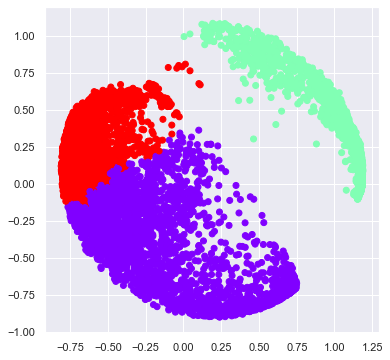

In [6]:
## fitting agglomerative algo on data for no. of clusters 3
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

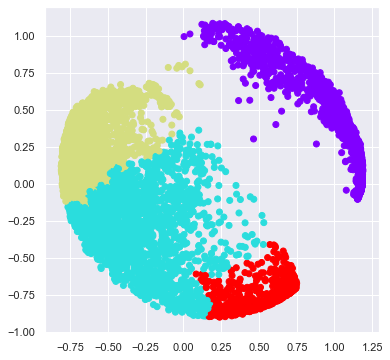

In [7]:
## fitting agglomerative algo on data for no. of clusters 4
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

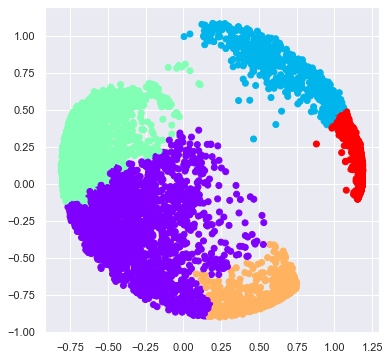

In [8]:
## fitting agglomerative algo on data for no. of clusters 5
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

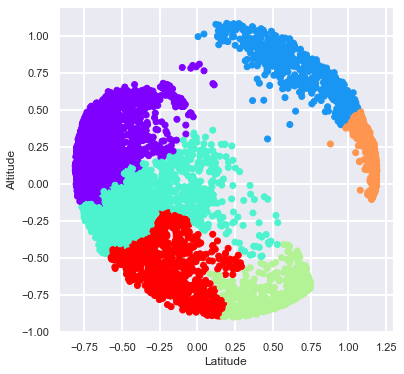

In [9]:
## fitting agglomerative algo on data for no. of clusters 6
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.grid(color='white', linewidth=2)
plt.xlabel('Latitude')
plt.ylabel('Altitude')
plt.plot()
plt.savefig('output/cluster_6', dpi = 500)

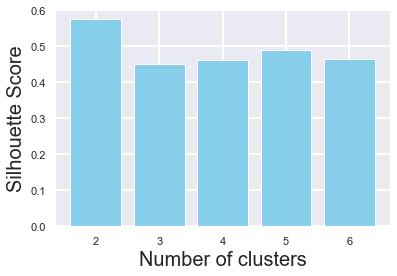

In [12]:
## fetching the data from different n clusters of agglomerative algo and ploting its silhoutte score
k = [2, 3, 4, 5, 6]

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))


plt.bar(k, silhouette_scores, color='skyblue')
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette Score', fontsize = 20)
plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('output/compare', dpi = 500)

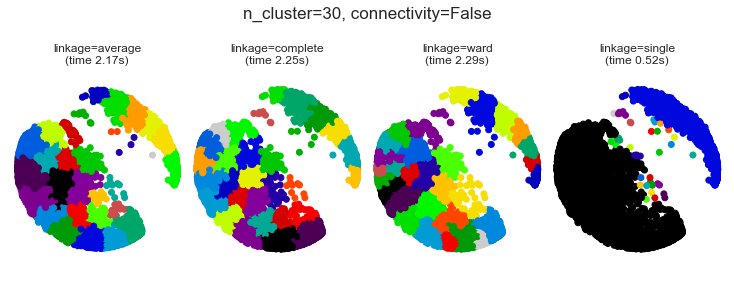

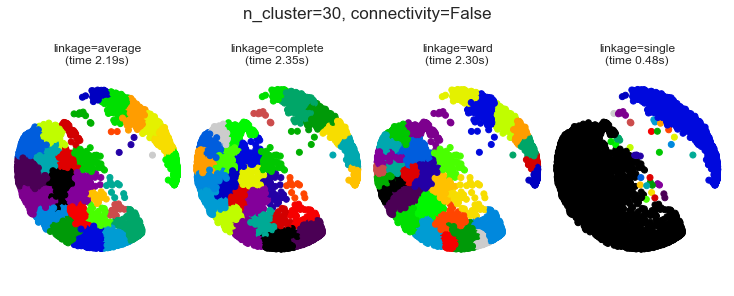

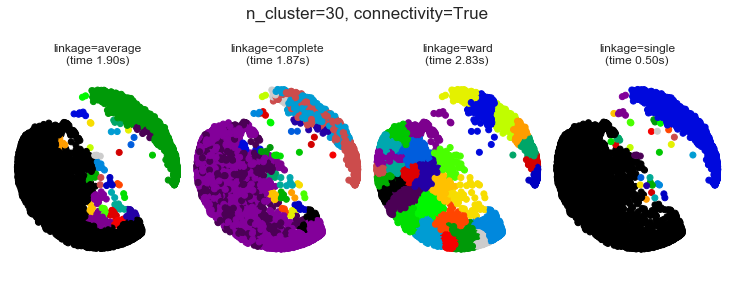

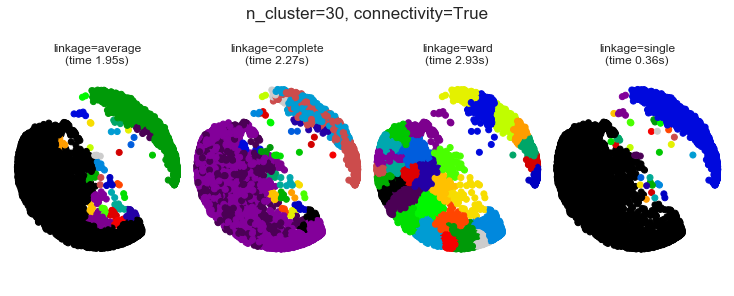

In [12]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


knn_graph = kneighbors_graph(X_principal, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 30):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X_principal)
            elapsed_time = time.time() - t0
            plt.scatter(X_principal.iloc[:, 0], X_principal.iloc[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )
plt.grid(color='white', linewidth=2)    
plt.plot()
plt.savefig('output/cluster_30', dpi = 500)

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [8]:
algo_silhouette = []
cal_score = []
db_score = []

for i in range(2,12):
    algo = AgglomerativeClustering(n_clusters=i).fit(X_principal)
    preds = algo.fit_predict(X_principal)
    
    silhouette = silhouette_score(X_principal,preds)
    algo_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_principal,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    chs = calinski_harabasz_score(X_principal,preds)
    cal_score.append(chs)
    print("Calinski harabasz score for number of cluster(s) {}: {}".format(i,chs))
    
    print("---------------------------------------------------------------------")

Silhouette score for number of cluster(s) 2: 0.5757154177648498
Davies Bouldin score for number of cluster(s) 2: 0.6218225108739646
Calinski harabasz score for number of cluster(s) 2: 8799.626840573861
---------------------------------------------------------------------
Silhouette score for number of cluster(s) 3: 0.4517537989037796
Davies Bouldin score for number of cluster(s) 3: 0.7858472046241971
Calinski harabasz score for number of cluster(s) 3: 9755.365501760474
---------------------------------------------------------------------
Silhouette score for number of cluster(s) 4: 0.462822259886483
Davies Bouldin score for number of cluster(s) 4: 0.7116413595462785
Calinski harabasz score for number of cluster(s) 4: 11006.253227301273
---------------------------------------------------------------------
Silhouette score for number of cluster(s) 5: 0.48930381623778907
Davies Bouldin score for number of cluster(s) 5: 0.655313584544041
Calinski harabasz score for number of cluster(s) 5: 

## KMeans

In [9]:
from sklearn.cluster import KMeans

In [10]:
km_scores= []
km_silhouette = []
cal_score = []
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_principal)
    preds = km.predict(X_principal)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_principal)))
    km_scores.append(-km.score(X_principal))
    
    silhouette = silhouette_score(X_principal,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_principal,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    chs = calinski_harabasz_score(X_principal,preds)
    cal_score.append(chs)
    print("Calinski harabasz score for number of cluster(s) {}: {}".format(i,chs))
    
    print("---------------------------------------------------------------------")

Score for number of cluster(s) 2: -1820.560533955164
Silhouette score for number of cluster(s) 2: 0.5824198056543832
Davies Bouldin score for number of cluster(s) 2: 0.6934116219532204
Calinski harabasz score for number of cluster(s) 2: 10661.298927226357
---------------------------------------------------------------------
Score for number of cluster(s) 3: -967.2700517372716
Silhouette score for number of cluster(s) 3: 0.5840660921579615
Davies Bouldin score for number of cluster(s) 3: 0.6276627314387415
Calinski harabasz score for number of cluster(s) 3: 13058.425204879884
---------------------------------------------------------------------
Score for number of cluster(s) 4: -700.5177974737236
Silhouette score for number of cluster(s) 4: 0.5915768268528211
Davies Bouldin score for number of cluster(s) 4: 0.5428956452029219
Calinski harabasz score for number of cluster(s) 4: 12889.707506787909
---------------------------------------------------------------------
Score for number of cl

In [ ]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(km)
visualizer.fit(X_principal)
visualizer.show()

## DBSCAN

0.043847249304959576


<Figure size 360x360 with 0 Axes>

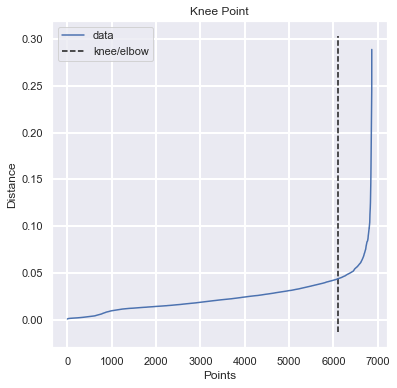

In [11]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_principal)
distances, indices = neighbors.kneighbors(X_principal)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])
plt.grid(color='white', linewidth=2)
plt.savefig('output/DBSCAN', dpi = 500)

In [25]:
from sklearn.cluster import DBSCAN

algo_silhouette = []
cal_score = []
db_score = []

for i in range(2,12):
    algo = DBSCAN(eps=0.04, min_samples= i).fit(X_principal)
    preds = algo.fit_predict(X_principal)
    
    silhouette = silhouette_score(X_principal,preds)
    algo_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_principal,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    chs = calinski_harabasz_score(X_principal,preds)
    cal_score.append(chs)
    print("Calinski harabasz score for number of cluster(s) {}: {}".format(i,chs))
    
    print("---------------------------------------------------------------------")

Silhouette score for number of cluster(s) 2: -0.25769718240604655
Davies Bouldin score for number of cluster(s) 2: 1.3772365681740084
Calinski harabasz score for number of cluster(s) 2: 297.4372317597215
---------------------------------------------------------------------
Silhouette score for number of cluster(s) 3: -0.1890511143553588
Davies Bouldin score for number of cluster(s) 3: 1.5502856249241017
Calinski harabasz score for number of cluster(s) 3: 538.8137911976913
---------------------------------------------------------------------
Silhouette score for number of cluster(s) 4: -0.0005781521032801058
Davies Bouldin score for number of cluster(s) 4: 1.5642243366135036
Calinski harabasz score for number of cluster(s) 4: 933.7027477901821
---------------------------------------------------------------------
Silhouette score for number of cluster(s) 5: 0.04558675278510455
Davies Bouldin score for number of cluster(s) 5: 1.369882797976946
Calinski harabasz score for number of cluster